# Analiza dohodkov v metu Kibergraad

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv('Kibergrad.csv')

In [6]:
df

,'TIP','CLANOV','OTROK','DOHODEK','CETRT','IZOBRAZBA'
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
43881,1,5,3,30800,4,36
43882,1,2,0,16684,4,34
43883,1,2,0,12000,4,39
43884,1,2,0,50022,4,34


In [7]:
df = df.rename(columns={"'TIP'": 'TIP', "'CLANOV'": 'CLANOV', "'OTROK'": 'OTROK', "'DOHODEK'": 'DOHODEK', "'CETRT'": 'CETRT', "'IZOBRAZBA'": 'IZOBRAZBA'})

In [8]:
df

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
43881,1,5,3,30800,4,36
43882,1,2,0,16684,4,34
43883,1,2,0,12000,4,39
43884,1,2,0,50022,4,34


Iz vsake četrti vzemimo enostaven slučajni vzorec velikosti 100.

In [9]:
filter1 = (df["CETRT"] == 1)
prva_cetrt = df[filter1]

In [10]:
filter2 = (df["CETRT"] == 2)
druga_cetrt = df[filter2]

In [11]:
filter3 = (df["CETRT"] == 3)
tretja_cetrt = df[filter3]

In [12]:
filter4 = (df["CETRT"] == 4)
cetrta_cetrt = df[filter4]

In [13]:
vzorec1 = prva_cetrt.sample(100)
vzorec2 = druga_cetrt.sample(100)
vzorec3 = tretja_cetrt.sample(100)
vzorec4 = cetrta_cetrt.sample(100)

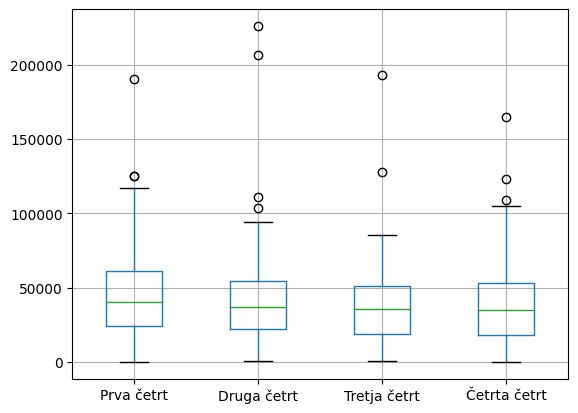

In [15]:
podtabela = pd.DataFrame({"Prva četrt": vzorec1["DOHODEK"].tolist(),
"Druga četrt": vzorec2["DOHODEK"].tolist(),
"Tretja četrt": vzorec3["DOHODEK"].tolist(),
"Četrta četrt": vzorec4["DOHODEK"].tolist()})

graf = podtabela.boxplot(column=["Prva četrt", "Druga četrt", "Tretja četrt", "Četrta četrt"])
plt.show()

In [16]:
severna2 = prva_cetrt.sample(100)
severna3 = prva_cetrt.sample(100)
severna4 = prva_cetrt.sample(100)
severna5 = prva_cetrt.sample(100)

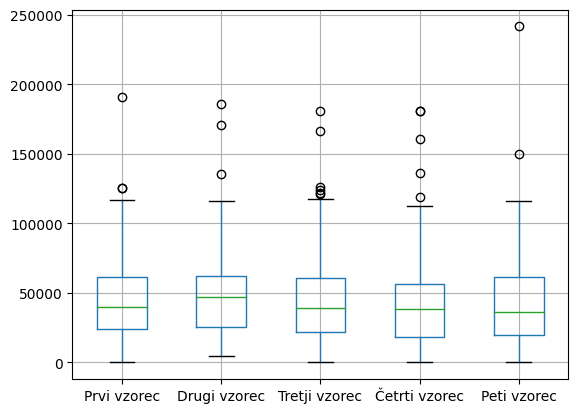

In [18]:
podtabela1 = pd.DataFrame({"Prvi vzorec": vzorec1["DOHODEK"].tolist(), 
"Drugi vzorec": severna2["DOHODEK"].tolist(), 
"Tretji vzorec": severna3["DOHODEK"].tolist(),
"Četrti vzorec": severna4["DOHODEK"].tolist(),
"Peti vzorec": severna5["DOHODEK"].tolist()})

graf2 = podtabela1.boxplot(column=["Prvi vzorec", "Drugi vzorec", "Tretji vzorec", "Četrti vzorec", "Peti vzorec"])
plt.show()

# Indeks srečnosti

In [19]:
import math
u_doh = int(df["DOHODEK"].mean())
u_izo = float(df["IZOBRAZBA"].mean())
def funkcija(x):
    if x < u_doh:
        return 2**(x /u_doh)
    else:
        return 2 + math.log(1 + (x - u_doh)/u_doh, 2)

In [20]:
def normalna(x):
    return 1/math.sqrt(2*math.pi*float(df["IZOBRAZBA"].var()))*math.exp(-(x - u_izo)**2/(2*float(df["IZOBRAZBA"].var())))

In [21]:
df["SRECNOST"] = (df["OTROK"])*(df["DOHODEK"].apply(funkcija))*(df["IZOBRAZBA"].apply(normalna)+20)
df_srecen = df.sort_values("SRECNOST", ascending=False)
df_srecen

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
37379,1,12,9,78555,4,46,527.066465
12810,1,10,8,100500,2,43,526.801403
8946,1,9,7,114535,1,43,487.440731
38998,1,9,6,133090,4,31,442.496026
18596,1,14,9,49880,2,46,409.050107
...,...,...,...,...,...,...,...
25062,1,2,0,13920,3,36,0.000000
8021,1,2,0,70000,1,39,0.000000
25056,3,3,0,23245,3,39,0.000000
25055,3,4,0,29675,3,34,0.000000


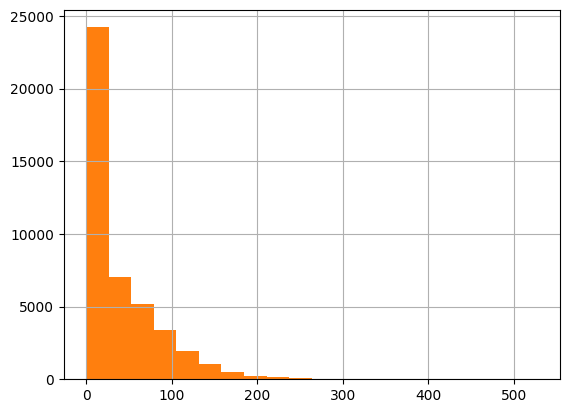

In [23]:
df["SRECNOST"].hist(bins=20)
plt.show()